# Interpolacija funkcija

---

Neka je zadana funkcija $f(x)$ na intervalu $[a,b]$.

Odaberimo $n+1$ točku $x_i, i=0,\ldots, n$, u intervalu $[a,b]$ tako da je $x_i\neq x_j$
te kroz točke $T_i=(x_i,f(x_i))$ provucimo interpolacijski polinom.

__Teorem.__ Za svaku točku $x\in[a,b]$ vrijedi __ocjena pogreške__ (uz pretpostavku da funkcija $f$ ima $n+1$ derivaciju) 

\begin{align*}
f(x)-p_n(x)&=\frac{\omega(x)}{(n+1)!} \,f^{(n+1)}(\xi), \\
\omega(x)&=\prod_{k=0}^n (x-x_k)=(x-x_0)(x-x_1)\cdots (x-x_n),\quad  \xi \in (a,b).\tag{1}
\end{align*}

_Dokaz._ (Vidi [Numerička matematika, str. 23][RS04].) 

Za $x=x_i$,  tvrdnja je očigledna. U suprotnom, definirajmo pomoćnu funkciju 

$$g(y)= f(y)-p_n(y)-k\omega(y),$$

pri čemu je konstanta $k$ odabrana tako da je $g(x)=0$.
Na taj način funkcija $g$ ima barem $n+2$ nultočke, 
$x,x_0,x_1,\ldots,x_n$. 
Prema Rolleovom teoremu, derivacija $g'$ ima barem $n+1$ nultočku, $g''$ ima barem $n$ nultočaka, itd. Funkcija $g^{(n+1)}$ ima barem jednu nultočku $\xi\in(a,b)$.

Vrijedi $p_n^{(n+1)}(y)=0$ i $\omega^{(n+1)}(y)=(n+1)!$ (vodeći koeficijent od $\omega$ je $1$). Uvrštavanje daje 

$$0=g^{(n+1)}(\xi)=f^{(n+1)}(\xi)-k(n+1)!$$ 

pa je $k=\displaystyle\frac{f^{(n+1)}(\xi)}{(n+1)!}$ i teorem je dokazan.

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."


## Primjer

Promotrimo funkciju 

$$
f(x)=\sin(x), \quad x\in[0,\pi].
$$

In [1]:
using Polynomials
using Plots

In [2]:
# Ova datoteka omogućuje manipulaciju s Vandermondeovim matricama
include("../files/Vandermonde.jl")

Matrix (generic function with 1 method)

In [3]:
n=7
a=0
b=pi
x=range(a,stop=b,length=n)
f(x)=sin(x)
y=f.(x)

7-element Array{Float64,1}:
 0.0
 0.49999999999999994
 0.8660254037844386
 1.0
 0.8660254037844387
 0.49999999999999994
 1.2246467991473532e-16

In [4]:
A=Vandermonde(x)

7×7 Vandermonde{Float64}:
 1.0  0.0       0.0        0.0        0.0          0.0          0.0
 1.0  0.523599  0.274156   0.143548   0.0751613    0.0393544    0.0206059
 1.0  1.0472    1.09662    1.14838    1.20258      1.25934      1.31878
 1.0  1.5708    2.4674     3.87578    6.08807      9.56312     15.0217
 1.0  2.0944    4.38649    9.18704   19.2413      40.2989      84.4018
 1.0  2.61799   6.85389   17.9434    46.9758     122.982      321.967
 1.0  3.14159   9.8696    31.0063    97.4091     306.02       961.389

In [5]:
c=A\y

7-element Array{Float64,1}:
  0.0
  1.0005387684360314
 -0.002845097166405059
 -0.1607350514995937
 -0.006412541801696466
  0.012220929943706854
 -0.0012966809398138209

In [6]:
p=Polynomial(c)

Polynomial(1.0005387684360314*x - 0.002845097166405059*x^2 - 0.1607350514995937*x^3 - 0.006412541801696466*x^4 + 0.012220929943706854*x^5 - 0.0012966809398138209*x^6)

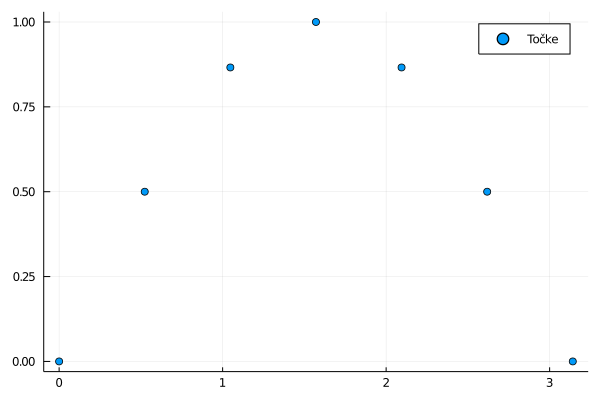

In [7]:
scatter(x,y,label="Točke")

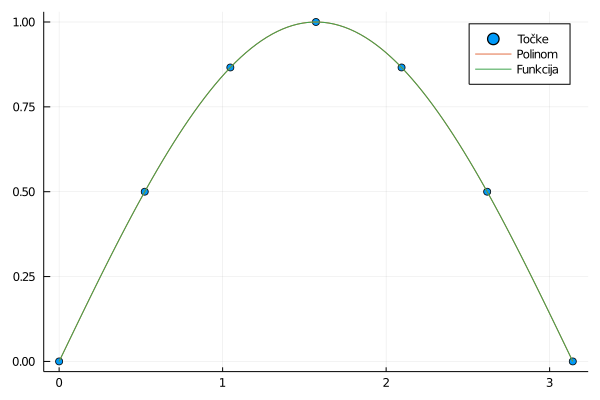

In [8]:
xx=range(a,stop=b,length=100)
pf=p.(xx)
F=f.(xx)
plot!(xx,[pf F],label=["Polinom" "Funkcija"])

In [9]:
# maksimalne apsolutna i relativna pogreška
using LinearAlgebra
norm(pf[2:end-1]-F[2:end-1],Inf), 
norm((pf[2:end-1]-F[2:end-1])./F[2:end-1],Inf)

(3.3859074824782454e-5, 0.00045433259905906196)

## Čebiševljeve točke

__Čebiševljevi polinomi__ su polinomi stupnja $n$ dani formulom

$$
T_n(x)=\cos(n\, \arccos x), \quad n=0,1,2,\ldots
$$

Adiciona formula

$$
\cos(n+1)\varphi+\cos(n-1)\varphi=2\cos\varphi \cos n\varphi
$$

uz $\varphi=\arccos x$ daje rekurzivnu formulu:

\begin{align*}
T_0(x)&=1,\\ 
T_1(x)&=x,\\ 
T_{n+1}(x)&=2\,x\,T_n(x)-T_{n-1}(x), \quad n=1,2,\ldots
\end{align*}

Dakle, 

$$
T_2(x)=2x^2-1,\quad T_3(x)=4x^3-3x, \ldots
$$

Nul-točke polinoma $T_n(x)$ su 

$$
x_k=\cos \bigg(\frac{2k-1}{2n}\pi\bigg), \quad k=1,2,\ldots,n.
$$

Sve nul-točke leže unutar intervala $[-1,1]$. U točkama

$$
\xi_k=\cos \bigg(\frac{k\pi}{n}\bigg), \quad k=0,1,2,\ldots,n,
$$

$T_n(x)$ naizmjenično dostiže lokalne minimume i maksimume, $1$ i $-1$, na intervalu $[-1,1]$.

Na intervalu $[-1,1]$ polinom $T_n(x)$ poprima vrijednosti u intervalu $[-1,1]$. 


### Primjer

In [10]:
T(n,x)=cos.(n*acos.(x))

T (generic function with 1 method)

In [11]:
x₁=range(-1,stop=1,length=100)
y₁=T(10,x₁);

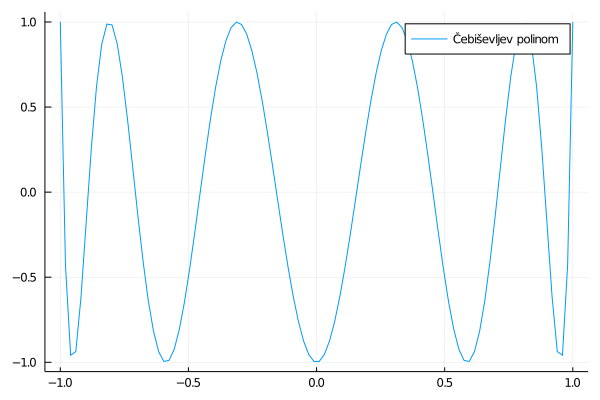

In [12]:
plot(x₁,y₁,label="Čebiševljev polinom")

In [13]:
# Nul-točke
xₙ=[cos((2*k-1)*pi/(2*10)) for k=10:-1:1]

10-element Array{Float64,1}:
 -0.9876883405951377
 -0.8910065241883678
 -0.7071067811865475
 -0.45399049973954675
 -0.1564344650402306
  0.15643446504023092
  0.45399049973954686
  0.7071067811865476
  0.8910065241883679
  0.9876883405951378

In [14]:
yₙ=T(10,xₙ)

10-element Array{Float64,1}:
 -6.492484977390737e-15
 -7.354070601250002e-16
 -2.6948419387607653e-15
 -9.803364199544708e-16
 -2.4499125789312946e-15
  5.51091059616309e-16
 -4.286263797015736e-16
  3.061616997868383e-16
 -1.0718754395722282e-15
  2.7257675990577433e-15

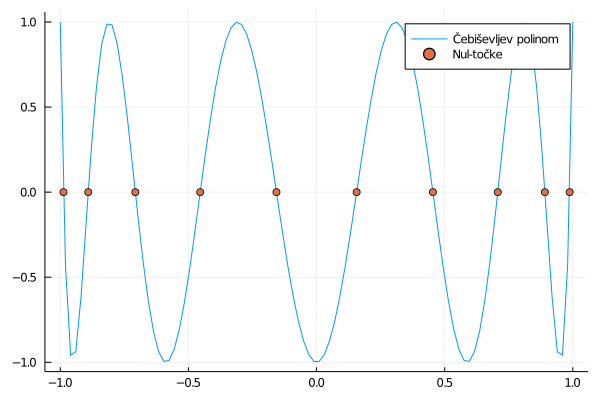

In [15]:
scatter!(xₙ,yₙ,label="Nul-točke")

### Norme funkcija

Za funkcije 

$$f,g:[a,b]\to \mathbb{R}$$

definiramo __skalarni produkt__

$$
(f,g)=\int_a^b f(x)g(x)\, dx
$$

i __težinski skalarni produkt__ s __težinom__ $\omega(x)>0$

$$
(f,g)_\omega=\int_a^b f(x)g(x)\omega(x)\, dx
$$

Funkcije $f$ i $g$ su __ortogonalne__ ako je $(f,g)=0$ ili ako je $(f,g)_\omega=0$.

Sljedeće tri __norme__ su prirodna poopćenja odgovarajućih vektorskih normi:

\begin{align*}
\|f\|_2&=\sqrt{(f,f)}=\sqrt{\int_a^b f^2(x)\, dx} \\
\|f\|_1 &= \int_a^b \big|f(x)\big|\, dx \\
\|f\|_\infty&=\max_{x\in[a,b]} \big|f(x)\big|
\end{align*}

Vrijedi sljedeći važan teorem:

__Teorem__. Od svih polinoma stupnja manjeg ili jednakog $n$ čiji je koeficijent uz najveću potenciju jednak $1$, najmanju 
$\|\cdot\|_\infty$ na intervalu $[-1,1]$ ima upravo polinom 
$\displaystyle\frac{1}{2^{n-1}}T_n(x)$ i ta norma iznosi $\displaystyle\frac{1}{2^{n-1}}$.

_Dokaz_ : (Vidi [Numerička matematika, str. 101][RS04].)

Koeficijent Čebiševljevog polinoma $T_n(x)$ uz potenciju $x^n$ je $2^{n-1}$.
Stoga polinom $\displaystyle\frac{1}{2^{n-1}}T_n(x)$ uz potenciju $x^n$ ima koeficijent $1$. Također, zbog svojstva Čebiševljevih polinoma vrijedi

$$\left| \displaystyle\frac{1}{2^{n-1}}T_n(x) \right| \leq \displaystyle\frac{1}{2^{n-1}}$$

pa je

$$\left\| \displaystyle\frac{1}{2^{n-1}}T_n(x) \right\|_\infty = \displaystyle\frac{1}{2^{n-1}}.$$

Pretpostavimo da za polinom 

$$p_n(x)=x^n + \alpha_{n-1}x^{n-1} +\alpha_{n-2}x^{n-2}+\cdots \alpha_1 x+\alpha_0$$

vrijedi $| p_n(x)|< \displaystyle\frac{1}{2^{n-1}}$ za svaki $x\in[-1,1]$. Neka su $\xi_0,\xi_1,\ldots,\xi_n$ točke u kojima $T_n(x)$ poprima ekstremne vrijednosti $-1$ ili $1$. Vrijedi

$$
\begin{aligned}
p_n(\xi_0) & < \frac{1}{2^{n-1}}T_n(\xi_0) = \frac{1}{2^{n-1}} \cr
p_n(\xi_1) & > \frac{1}{2^{n-1}}T_n(\xi_1) = -\frac{1}{2^{n-1}} \cr
p_n(\xi_2) & < \frac{1}{2^{n-1}}T_n(\xi_2) = \frac{1}{2^{n-1}} \cr
& \vdots
\end{aligned}$$

To bi značilo da polinom $p_n(x)-\frac{1}{2^{n-1}}T_n(x)$ stupnja $n-1$ mijenja predznak $n$ puta, što je nemoguće, pa je teorem dokazan.

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

Zaključujemo da će polinomna aproksimacija (1) biti najbolja ako na intervalu $[-1,1]$ 
odaberemo

$$\omega(x)=\frac{1}{2^{n}} T_{n+1}(x),$$ 

odnosno ako na intervalu $[a,b]$ za 
točke interpolacije $x_0,x_1,\ldots,x_n$ odaberemo upravo nul-točke polinoma $T_{n+1}(x)$ preslikane na interval $[a,b]$.

### Promjena intervala

Sustav ortogonalnih funkcija $\Phi_i$ na intervalu $[-1,1]$ pomoću transformacije 

$$
\gamma :[a,b]\to [-1,1],\quad \gamma(x)=\frac{2x}{b-a}-\frac{a+b}{b-a}
$$

prelazi u sustav ortogonalnih funkcija na intervalu $[a,b]$

$$
\Psi_i(x)=\Phi_i(\gamma(x)).
$$

Nama je potrebna inverzna transformacija:

$$
x=\frac{a+b}{2}+\frac{b-a}{2}\gamma(x) .
$$

In [16]:
# Odaberimo za interpolaciju sinusa nul-točke polinoma T(n,x)
xc=(a+b)/2 .+(b-a)/2*[cos((2*k-1)*pi/(2*n)) for k=n:-1:1]

7-element Array{Float64,1}:
 0.03938314344987037
 0.3426983059615072
 0.8892533431330012
 1.5707963267948966
 2.252339310456792
 2.7988943476282864
 3.1022095101399225

In [17]:
yc=f.(xc)

7-element Array{Float64,1}:
 0.03937296348682845
 0.33602971555330546
 0.7766015761513065
 1.0
 0.7766015761513066
 0.3360297155533052
 0.03937296348682879

In [18]:
Ac=Vandermonde(xc)
cc=Ac\yc
pc=Polynomial(cc)

Polynomial(-1.3316162347114247e-5 + 1.000423399295222*x - 0.002364992535286439*x^2 - 0.16136733250188348*x^3 - 0.0060333776084695095*x^4 + 0.012114537966005331*x^5 - 0.0012853924003761086*x^6)

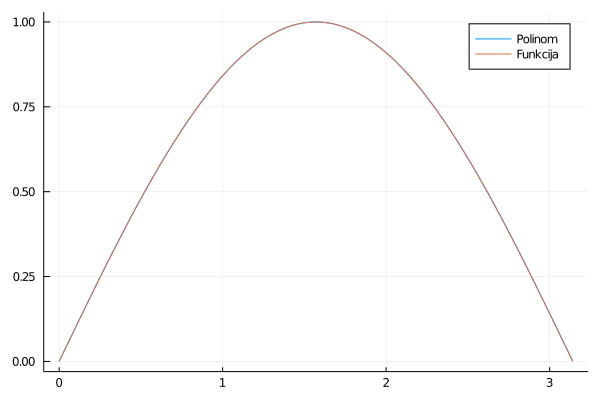

In [19]:
xx=range(a,stop=b,length=100)
pC=pc.(xx)
F=f.(xx)
plot(xx,[pC F],label=["Polinom" "Funkcija"])

In [20]:
# maksimalne apsolutna i relativna pogreška
norm(pC[2:end-1]-F[2:end-1],Inf), 
norm((pC[2:end-1]-F[2:end-1])./F[2:end-1],Inf)

(1.202853961437822e-5, 0.00010165298714936137)

Pogledajmo kako izgledaju stvarne pogreške u oba slučaja:

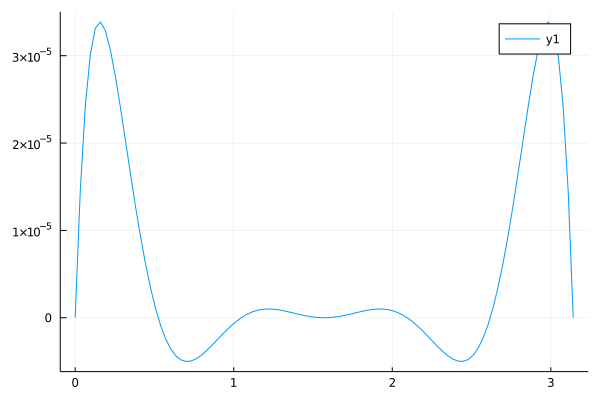

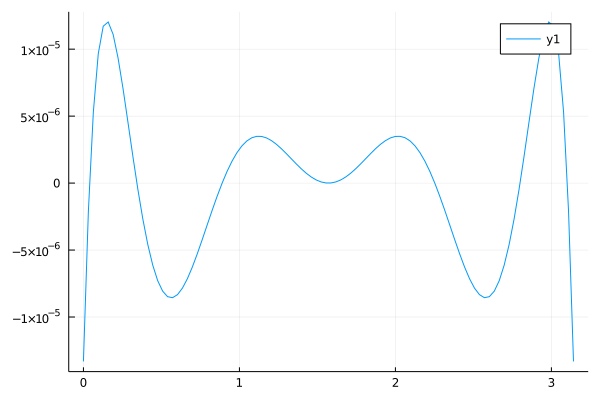

(nothing, nothing)

In [21]:
p₁=plot(xx,pf-F) # ravnomjerno raspoređene točke
p₂=plot(xx,pC-F) # Čebiševljeve točke
display(p₁),display(p₂)

Vidimo da su za Čebiševljeve točke postignute manje pogreške.

__Napomena.__ Ovdje smo, radi jednostavnosti, koristili najmanje točnu varijantu računanja interpolacijskog polinoma.

### Primjer 

Napravimo još jedan zanimljiv primjer (vidi [Numerička matematika, str. 24][RS04]):
interpolirajmo funkciju

$$
f(x)=1-|x-1|,\quad x\in[0,2]
$$

polinomima stupnja 10. Velika odstupnanja interpolacijskog polinoma u rubovima zovu se __Rungeov fenomen__. Fenomen nestaje kada se funkcija interpolira u Čebiševljevim točkama. 

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."


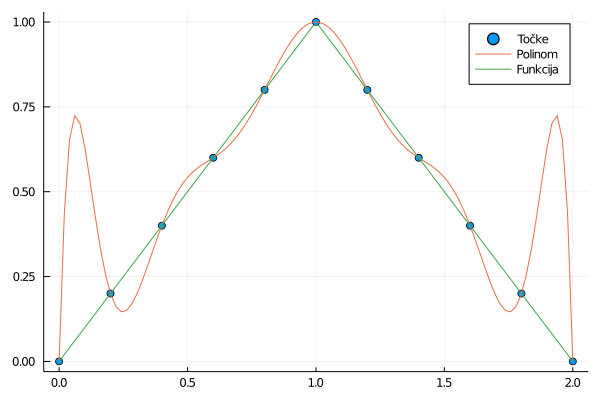

In [22]:
n=11
a=0
b=2
f(x)=1 .-abs.(x .-1)

# Ravnomjerno raspoređene točke
x=range(a,stop=b,length=n)
y=f(x)
A=Vandermonde(x)
c=A\y
p=Polynomial(c)

xx=range(a,stop=b,length=100)
pf=p.(xx)
F=f(xx)
scatter(x,y,label="Točke")
plot!(xx, [pf F], label=["Polinom" "Funkcija"])

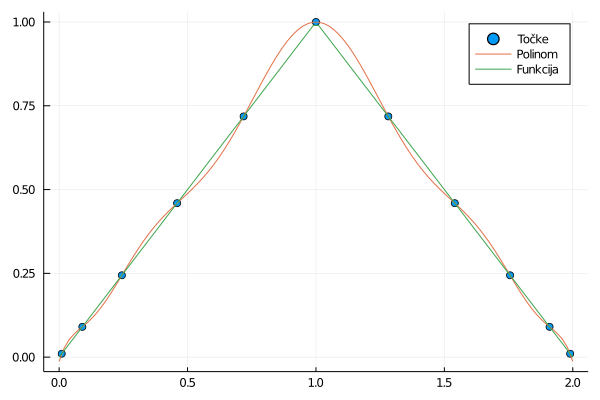

In [23]:
# Čebiševljeve točke
xc=(a+b)/2 .+(b-a)/2*[cos((2*k-1)*pi/(2*n)) for k=n:-1:1]
yc=f(xc)
Ac=Vandermonde(xc)
cc=Ac\yc
pc=Polynomial(cc)
pCheb=pc.(xx)
scatter(xc,yc,label="Točke")
plot!(xx,[pCheb F],label=["Polinom" "Funkcija"])